In [140]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold,GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [110]:
df = pd.read_csv('/content/mtcars.csv',nrows=100)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [112]:
X = df.drop(columns = ['mpg'])
X.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


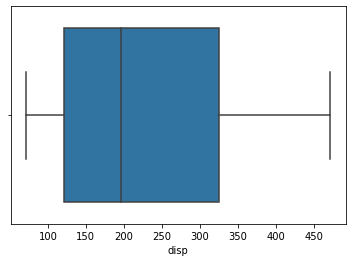

In [113]:
sns.boxplot(df.disp)
plt.show()

In [114]:
y = df[['mpg']]
y.head()

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


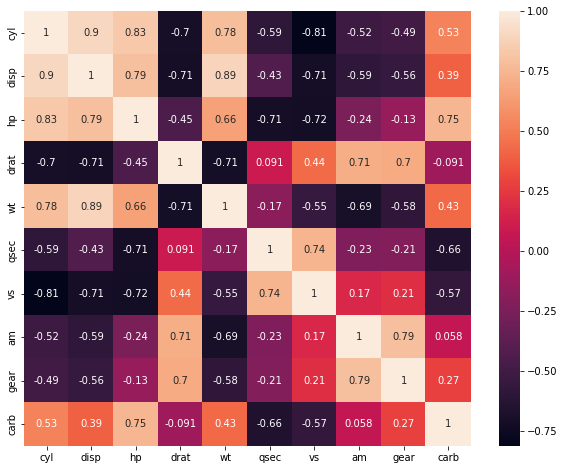

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot = True)
plt.show()

In [116]:
X.drop(columns = ['cyl','hp','wt','am'],axis = 1,inplace = True)
X.head()

,disp,drat,qsec,vs,gear,carb
0,160.0,3.90,16.46,0,4,4
1,160.0,3.90,17.02,0,4,4
2,108.0,3.85,18.61,1,4,1
3,258.0,3.08,19.44,1,3,1
4,360.0,3.15,17.02,0,3,2


In [117]:
model = LinearRegression()

In [132]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [120]:
param = {'fit_intercept':[True,False], 'normalize':['deprecated'], 'copy_X':[True,False], 'n_jobs':[None], 'positive':[False,True]}

In [ ]:
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X,y)

In [ ]:
print('Best Score: %s'% result.best_score_)
print('Best parameter: %s'% result.best_params_)

Best Score: -2.532230230875145
Best parameter: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [ ]:
model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= 'deprecated', positive= False)

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7)

In [142]:
model.fit(X_train,y_train)

LinearRegression()

In [143]:
y_pred = model.predict(X_test)

In [144]:
model.score(X_train,y_train) * 100

81.35210915708772

In [145]:
model.score(X_test,y_test) * 100

83.21430676076425

In [146]:
mean_absolute_error(y_test,y_pred)

2.4121931795670495

In [147]:
model.score(X,y)

0.8217635836917483